# Проект - Восстановление золота из руды

Подготовим модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.


Модель необходима для  оптимизизации производство, чтобы не запускать предприятие с убыточными характеристиками.

Описание данных  
Технологический процесс  
- Rougher feed — исходное сырье  
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant   
- Xanthate — ксантогенат (промотер, или активатор флотации);  
- Sulphate — сульфат (на данном производстве сульфид натрия);    
- Depressant — депрессант (силикат натрия).  
- Rougher process (англ. «грубый процесс») — флотация  
- Rougher tails — отвальные хвосты  
- Float banks — флотационная установка  
- Cleaner process — очистка  
- Rougher Au — черновой концентрат золота  
- Final Au — финальный концентрат золота  

Параметры этапов  
- air amount — объём воздуха  
- fluid levels — уровень жидкости  
- feed size — размер гранул сырья  
- feed rate — скорость подачи  

Возможные значения для блока [этап]:  
- rougher — флотация  
- primary_cleaner — первичная очистка  
- secondary_cleaner — вторичная очистка  
- final — финальные характеристики  
Возможные значения для блока [тип_параметра]:  
- input — параметры сырья  
- output — параметры продукта  
- state — параметры, характеризующие текущее состояние этапа  
- calculation — расчётные характеристики  

Цель: 

-  Построить модель для предсказания коэффициента восстановления золота из золотосодержащей руды

Задачи:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

**Данное исследование разделим на несколько частей**

***Часть 1. Изучение общей информации и подготовка данных:***
* [1.1 Регион 1.Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)
* [1.2 Обработка данных. Добавление и удаление столбцов](#2-bullet)
* [1.3 Работа с пропусками](#3-bullet)   

***Часть 2.Анализ данных:***  
* [2.1 Коцентрация металлов (Au, Ag, Pb).Графики распределения](#4-bullet)
* [2.2 Распределение размеров гранул исходного сырья](#5-bullet)
* [2.3 Суммарная концентрация металлов на разных стадиях](#6-bullet)



***Часть 3.Модель:***  
* [3.1 Функция  sMAPE](#7-bullet)
* [3.2 Масштабирование данных](#8-bullet)
* [3.3 Модель линейной регрессии](#9-bullet)
* [3.4 Модель дерево решений](#10-bullet)
* [3.5 Выводы ](#11-bullet)
 
  




## Подготовка данных

<a id='1-bullet'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

In [2]:
data_train = pd.read_csv('/datasets/gold_industry_train.csv')
data_test = pd.read_csv('/datasets/gold_industry_test.csv')
data_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [4]:
display(data_train.head())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [6]:
display(data_test.head())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [7]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [8]:
display(data_full.head())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


Приведем стобец date в обучающей и тестовой выборке к числовому формату

In [9]:
data_train['date'] = pd.to_datetime(data_train['date'],format='%Y-%m-%d %H:%M:%S')


In [10]:
data_train['date'] =data_train['date'].astype('int')

In [11]:
data_test['date'] = pd.to_datetime(data_test['date'],format='%Y-%m-%d %H:%M:%S')

In [12]:
data_test['date'] =data_test['date'].astype('int')

In [13]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
predictions_recovery = ((C*(F-T))/(F*(C-T)))*100
target_recovery = data_train['rougher.output.recovery']
print('MAE',mean_absolute_error(target_recovery,predictions_recovery))

MAE 9.83758577644259e-15


Вывод: эффективность обогащения рассчитана корректно   
Отклонение равно 0

In [14]:
columns_not_in_test = set(data_train.columns) - set(data_test.columns)

display(columns_not_in_test)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Проанализировав столбцы(признаки) которых нет в тестовой выборке, можно сделать вывод что это рассчетные величины и отвальные хвосты и консетраты    
Удалим колонки в обучающем датасете  - 35 столбцов  
Данные в этих столбцах не доуступны на моменте обучения и несут в себе лишнюю нагрузку на модель и необходимо будет ждать этих данных и не запускать модель в производство


<a id='2-bullet'></a>

In [15]:
data_train = data_train.drop(data_train.columns[[0,23,24,25,26,27,28,29,30,31,32,33,34,35,48,49,50,51,52,53,54,55,
                                                74,75,76,77,78,79,80,81,82,83,84,85,86]],axis =1)

In [16]:

data_test = data_test.drop(data_test.columns[0],axis =1)

In [17]:
data_train.duplicated().sum()

0

In [18]:
data_test.duplicated().sum()

0

<a id='3-bullet'></a>

In [19]:
data_train.isna().sum()

rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          72
rougher.input.feed_sol                         77
rougher.input.feed_rate                         7
rougher.input.feed_size                       101
rougher.input.floatbank10_sulfate              31
rougher.input.floatbank10_xanthate              7
rougher.state.floatbank10_a_air                 0
rougher.state.floatbank10_a_level               0
rougher.state.floatbank10_b_air                 0
rougher.state.floatbank10_b_level               0
rougher.state.floatbank10_c_air                 0
rougher.state.floatbank10_c_level               0
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air               429
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0
rougher.state.floatbank10_f_level               0


In [20]:
data_test.isna().sum()

rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0
rougher.state.floatbank10_f_level               0


Заполним пропуски  
там где пропуски 0.5% заполним средним значением(так как разброс не большой).  
там где <0.5% удалим пропуски. 

In [21]:
data_test.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


In [22]:
data_test['rougher.input.feed_pb'] = data_test['rougher.input.feed_pb'].fillna(data_test
                                                                               ['rougher.input.feed_pb'].mean())
data_test['rougher.input.feed_sol'] = data_test['rougher.input.feed_sol'].fillna(data_test
                                                                                 ['rougher.input.feed_sol'].mean())
data_test['rougher.input.feed_size'] = data_test['rougher.input.feed_size'].fillna(data_test
                                                                                   ['rougher.input.feed_size'].mean())
data_test['rougher.input.floatbank11_xanthate'] = data_test['rougher.input.floatbank11_xanthate'].fillna(data_test
                                                                                                         ['rougher.input.floatbank11_xanthate'].mean())
data_test['primary_cleaner.input.xanthate'] = data_test['primary_cleaner.input.xanthate'].fillna(data_test
                                                                                                 ['primary_cleaner.input.xanthate'].mean())
data_test['secondary_cleaner.state.floatbank2_a_air'] = data_test['secondary_cleaner.state.floatbank2_a_air'].fillna(data_test
                                                                                                                     ['secondary_cleaner.state.floatbank2_a_air'].mean())

In [23]:
data_test = data_test.dropna()

In [24]:
data_train.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,14574.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14578.000000,14579.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,18.697604,-484.971102,14.823764,-460.046154,15.394610,-487.973768,11.949009,-486.338692,18.927405,-505.688730
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,5.200943,48.795359,4.863659,67.933026,5.405045,35.231439,5.241169,38.726292,5.550829,37.347370
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,14.963312,-500.704937,11.889685,-500.184081,10.977413,-500.451167,8.947381,-500.129137,14.985721,-500.755346
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,18.005468,-499.820809,14.957945,-499.424528,14.963654,-499.772653,11.000057,-499.926255,19.960798,-500.054273
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,22.977019,-498.048862,17.125406,-400.083087,18.012762,-498.182011,14.002573,-499.285414,23.038231,-499.506135
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-123.307487


In [25]:
data_train['rougher.input.feed_pb'] = data_train['rougher.input.feed_pb'].fillna(data_train
                                                                               ['rougher.input.feed_pb'].mean())
data_train['rougher.input.feed_sol'] = data_train['rougher.input.feed_sol'].fillna(data_train
                                                                                 ['rougher.input.feed_sol'].mean())
data_train['rougher.input.feed_size'] = data_train['rougher.input.feed_size'].fillna(data_train
                                                                                   ['rougher.input.feed_size'].mean())
data_train['rougher.input.floatbank11_xanthate'] = data_train['rougher.input.floatbank11_xanthate'].fillna(data_train
                                                                                                         ['rougher.input.floatbank11_xanthate'].mean())
data_train['primary_cleaner.input.xanthate'] = data_train['primary_cleaner.input.xanthate'].fillna(data_train
                                                                                                 ['primary_cleaner.input.xanthate'].mean())
data_train['secondary_cleaner.state.floatbank2_a_air'] = data_train['secondary_cleaner.state.floatbank2_a_air'].fillna(data_train
                                                                                                                     ['secondary_cleaner.state.floatbank2_a_air'].mean())

In [26]:
data_train = data_train.dropna()

## Анализ данных

<a id='4-bullet'></a>

Коцентрация металлов (Au, Ag, Pb) в сырье

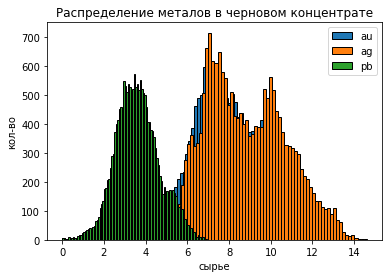

In [27]:
plt.hist(data_full['rougher.input.feed_au'],bins=100,edgecolor='black',label='au')


plt.hist(data_full['rougher.input.feed_ag'],bins=100,edgecolor='black',label='ag')

plt.hist(data_full['rougher.input.feed_pb'],bins=100,edgecolor='black',label='pb')

plt.title('Распределение металов в черновом концентрате')
plt.xlabel('сырье')
plt.ylabel('кол-во')
plt.legend()
plt.show();


Коцентрация металлов (Au, Ag, Pb) в черновом концентрате

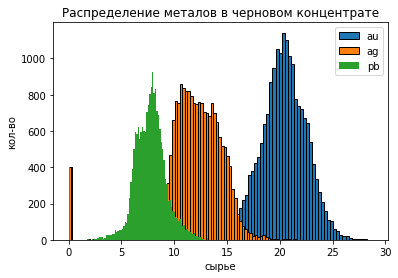

In [28]:
plt.hist(data_full['rougher.output.concentrate_au'],bins=100,edgecolor='black',label='au')


plt.hist(data_full['rougher.output.concentrate_ag'],bins=100,edgecolor='black',label='ag')

plt.hist(data_full['rougher.output.concentrate_pb'],bins=100,label='pb')

plt.title('Распределение металов в черновом концентрате')
plt.xlabel('сырье')
plt.ylabel('кол-во')
plt.legend()
plt.show();

Коцентрация металлов (Au, Ag, Pb) в концентрате после первой очистки

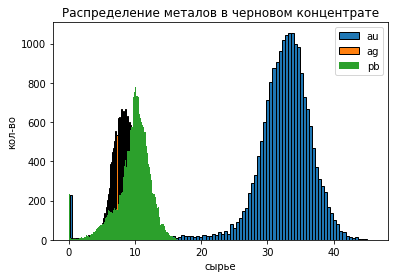

In [29]:
plt.hist(data_full['primary_cleaner.output.concentrate_au'],bins=100,edgecolor='black',label='au')


plt.hist(data_full['primary_cleaner.output.concentrate_ag'],bins=100,edgecolor='black',label='ag')

plt.hist(data_full['primary_cleaner.output.concentrate_pb'],bins=100,label='pb')

plt.title('Распределение металов в черновом концентрате')
plt.xlabel('сырье')
plt.ylabel('кол-во')
plt.legend()
plt.show();

Коцентрация металлов (Au, Ag, Pb) в финальном концентрате

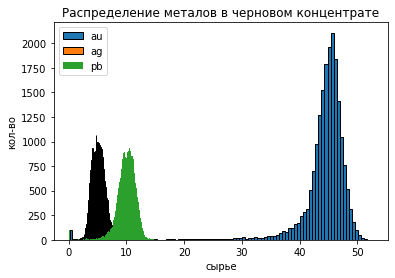

In [30]:
plt.hist(data_full['final.output.concentrate_au'],bins=100,edgecolor='black',label='au')


plt.hist(data_full['final.output.concentrate_ag'],bins=100,edgecolor='black',label='ag')

plt.hist(data_full['final.output.concentrate_pb'],bins=100,label='pb')

plt.title('Распределение металов в черновом концентрате')
plt.xlabel('сырье')
plt.ylabel('кол-во')
plt.legend()
plt.show();

Вывод:У металов распределение приближено к нормальному. 
  
у металов свинец и серебро распределение смещается влево, а у золото вправо. 


Распределение размеров гранул исходного сырья

<a id='5-bullet'></a>

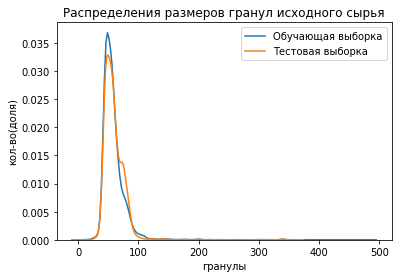

In [31]:
sns.kdeplot(data_train['rougher.input.feed_size'],label='Обучающая выборка')
sns.kdeplot(data_test['rougher.input.feed_size'],label='Тестовая выборка')
plt.title('Распределения размеров гранул исходного сырья')
plt.xlabel('гранулы')
plt.ylabel('кол-во(доля)')
plt.legend()
plt.show();

Вывод: Распределения НЕ сильно отличаются друг от друга. можно строить модель

Суммарная концентрация металлов на разных стадиях

<a id='6-bullet'></a>

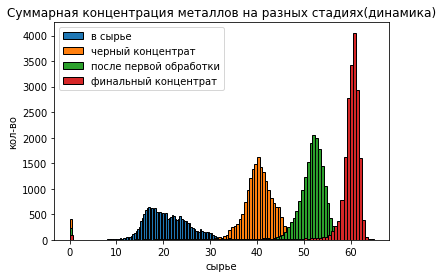

In [32]:

rougher_input = data_full['rougher.input.feed_au'] + data_full['rougher.input.feed_ag'] + data_full['rougher.input.feed_pb']

rougher_output = data_full['rougher.output.concentrate_au'] + data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_pb']

primary_cleaner = data_full['primary_cleaner.output.concentrate_au'] + data_full['primary_cleaner.output.concentrate_ag']+data_full['primary_cleaner.output.concentrate_pb']

final_output = data_full['final.output.concentrate_au'] + data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_pb']


plt.hist(rougher_input,bins=100,edgecolor='black',label='в сырье')


plt.hist(rougher_output,bins=100,edgecolor='black',label='черный концентрат')

plt.hist(primary_cleaner,bins=100,edgecolor='black',label='после первой обработки')
plt.hist(final_output,bins=100,edgecolor='black',label='финальный концентрат')

plt.title('Суммарная концентрация металлов на разных стадиях(динамика)')
plt.xlabel('сырье')
plt.ylabel('кол-во')
plt.legend()
plt.show();

Вывод:Сумарная концентрация сырья на каждом этапе растет последовательно с каждым этапом. При этом и выбросы показывают рост

Устраним выбросы в обучающей выборки(доступны только начальный этап)

In [33]:
lower_q_1 = data_train['rougher.input.feed_au'].quantile(0.01)
upper_q_1 = data_train['rougher.input.feed_au'].quantile(0.99)

lower_q_2 = data_train['rougher.input.feed_ag'].quantile(0.01)
upper_q_2 = data_train['rougher.input.feed_ag'].quantile(0.99)
lower_q_3 = data_train['rougher.input.feed_pb'].quantile(0.01)
upper_q_3 = data_train['rougher.input.feed_pb'].quantile(0.99)


In [34]:
data_train = data_train[(data_train['rougher.input.feed_au']>lower_q_1) & 
                        (data_train['rougher.input.feed_au'] < upper_q_1)]
data_train = data_train[(data_train['rougher.input.feed_ag']>lower_q_2) & 
                        (data_train['rougher.input.feed_ag'] < upper_q_2)]

data_train = data_train[(data_train['rougher.input.feed_pb']>lower_q_3) & 
                        (data_train['rougher.input.feed_pb'] < upper_q_3)]

## Модель

Функция sMAPE

<a id='7-bullet'></a>

In [35]:
def smape_unweighted(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = (abs(y_true) + abs(y_pred)) / 2 + 0.000000001
    result = ((error / scale).mean())*100
    return result

Для данного исследования подходит две модели:  
- Дерево решений
- Линейная регерессия   
Перед построением модели масштабируем данные 

<a id='8-bullet'></a>

In [36]:

features_train_rougher = data_train
target_train_rougher = data_full.loc[data_train.index,'rougher.output.recovery']
features_test_rougher  = data_test
target_test_rougher  = data_full.loc[data_test.index,'rougher.output.recovery']
features_train_final = data_train
target_train_final = data_full.loc[data_train.index,'final.output.recovery']
features_test_final  = data_test
target_test_final  = data_full.loc[data_test.index,'final.output.recovery']



In [37]:
scaler = StandardScaler()
features_train_rougher = scaler.fit_transform(features_train_rougher)
features_test_rougher = scaler.transform(features_test_rougher)
pd.options.mode.chained_assignment = None

In [38]:
scaler_1 = StandardScaler()
features_train_final = scaler_1.fit_transform(features_train_final)
features_test_final = scaler.transform(features_test_final)
pd.options.mode.chained_assignment = None

Модель Линейная регрессия

<a id='9-bullet'></a>

In [39]:
model_rougher_lr = LinearRegression() 

model_final_lr = LinearRegression() 


In [40]:

scores = cross_val_score(model_rougher_lr,features_train_rougher,
                         target_train_rougher,scoring  = make_scorer(smape_unweighted,greater_is_better = False),cv=5,n_jobs=-1)
total_scores = scores.mean()*-1
display(total_scores)

14.409776162341036

In [41]:
predicted_median = pd.Series(target_train_rougher.median(), index=target_train_rougher.index)
print("Median")
print(mean_absolute_error(target_train_rougher,predicted_median))

Median
7.249115389978004


In [42]:
scores_1 = cross_val_score(model_final_lr,features_train_final,
                         target_train_final,scoring = make_scorer(smape_unweighted,greater_is_better = False),cv=5,n_jobs=-1)
total_scores_1 = scores_1.mean()*-1
display(total_scores_1)

10.520052631227399

In [43]:
predicted_median_f = pd.Series(target_train_final.median(), index=target_train_final.index)
print("Median")
print(mean_absolute_error(target_train_final,predicted_median_f))

Median
6.273475545013256


In [44]:
smape_res = (total_scores*0.25 + total_scores_1*0.75)
print(smape_res)

11.492483514005809


Модель прогнозная выдает значения больше чем константная модель в среднем в 2 раза и это отрицательный момент
Итоговый smape - 11.5

Модель Дерево решений

<a id='10-bullet'></a>

In [45]:
model_dtr = DecisionTreeRegressor(random_state=12345)
parameters = {'min_samples_leaf':range(1,11,1),'max_depth':range(1,11,1)}
grid = GridSearchCV(model_dtr,parameters,cv=5,scoring = make_scorer(smape_unweighted,greater_is_better = False))
grid.fit(features_train_rougher,target_train_rougher) 
dtr_rougher = grid.best_score
display(dtr_rougher)

-12.158914301293612

In [46]:
predicted_median = pd.Series(target_train_rougher.median(), index=target_train_rougher.index)
print("Median")
print(mean_absolute_error(target_train_rougher,predicted_median))

Median
7.249115389978004


In [47]:
model_dtr_f = DecisionTreeRegressor(random_state=12345)
parameters = {'min_samples_leaf':range(1,11,1),'max_depth':range(1,11,1)}
grid = GridSearchCV(model_dtr_f,parameters,cv=5,scoring = make_scorer(smape_unweighted,greater_is_better = False))
grid.fit(features_train_final,target_train_final) 
dtr_final = grid.best_score_
display(dtr_final)

-9.733309442710858

In [48]:
predicted_median_f = pd.Series(target_train_final.median(), index=target_train_final.index)
print("Median")
print(mean_absolute_error(target_train_final,predicted_median_f))

Median
6.273475545013256


In [53]:
smape_res_1 = (dtr_rougher*0.25 + dtr_final*0.75)*-1
print(smape_res_1)

10.339710657356546


<a id='11-bullet'></a>

Модель показывает  результаты лучше чем у регрессии и sMape равна 10.3. (в отличии от регрессии - 11.5)

Выбираем модель дерево решений и проведем тестирование модели на тестовых данных

In [54]:
model_dtr_r_total = DecisionTreeRegressor(random_state=12345,max_depth=3,min_samples_leaf=6)
model_dtr_r_total.fit(features_train_rougher,target_train_rougher) 
predictions_r = model_dtr_r_total.predict(features_test_rougher) 

result_r = mean_squared_error(target_test_rougher,predictions_r)**0.5  
print("RMSE модели линейной регрессии на тестовой выборке:", result_r)

RMSE модели линейной регрессии на тестовой выборке: 15.045238796439644


In [55]:
model_dtr_f_total = DecisionTreeRegressor(random_state=12345,max_depth=2,min_samples_leaf=1) 
model_dtr_f_total.fit(features_train_final,target_train_final) 
predictions_f = model_dtr_f_total.predict(features_test_final) 

result_f = mean_squared_error(target_test_final,predictions_f)**0.5  
print("RMSE модели линейной регрессии на тестовой выборке:", result_f)

RMSE модели линейной регрессии на тестовой выборке: 10.812964008468914


Удельный вес

In [56]:
result_total = 0.25*result_r+result_f*0.75
display(result_total)

11.871032705461598

**Вывод:   
Наилучший результат показываем модель дерево решений  
Данную модель проверили на тестовой выборке
Метрика RMSE модели rougher.output.recovery  ~ 15  
Метрика RMSE модели final.output.recovery ~ 11  
сумма их удельного  веса  на результат составляет ~ 12  
показатель final.output.recovery и rougher.output.recovery от0 до 100.   
Значение на RMSE на  выборках показывает 12 что чуть более 10% и говорит об удовлетворительном результате**